# Model JST Plant Climate Chamber

### Jaringan Saraf Tiruan untuk Plant Climate Chamber

In [1]:
# Mengimpor pustaka yang dibutuhkan.

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Memasukkan dataset ke dalam jupyter.
data = pd.read_excel('Data/dataAll.xlsx')

In [3]:
# Memisahkan data input dan data target.

# Data Input
X = data[['Heater','AC','To','Radiation']]

# Data Target
target = data[['Td','RH','No','Variation','Month','Time']]

In [4]:
# Memisahkan data pelatihan (training), data validasi (validation), dan data pengujian (testing).

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

# Memisahkan 20% menjadi data tes
X_temp, X_test, y_temp, y_test = train_test_split(X, target, test_size=0.10, shuffle=True, random_state=15)

# Memisahkan 20% menjadi data validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=(10/90), shuffle=True, random_state=2019)

In [5]:
# Menghapus data temporary
del X_temp, y_temp

# print proportions
print('train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(target)*100,2),
                                                       round(len(y_val)/len(target)*100,2),
                                                       round(len(y_test)/len(target)*100,2)))

train: 80.0% | validation: 10.0% | test 10.0%


In [6]:
# banyak data
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(19200, 4) (2400, 4) (2400, 4) (19200, 6) (2400, 6) (2400, 6)


## Model Tuning menggunakan Multi-Layer Perceptron Regressor

In [7]:
# DESIGN PROCESS
print('DESIGN PROCESS')
print('-'*76)

# Pembuatan model
model_mlp = MLPRegressor(random_state = 1)
# model_mlp = MLPRegressor(random_state = 1, activation = 'logistic', hidden_layer_sizes=(55), solver='lbfgs', 
#                          alpha=0.001, max_iter = 5000)

print(model_mlp.get_params())

DESIGN PROCESS
----------------------------------------------------------------------------
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [8]:
# TRAINING PROCESS
print('TRAINING PROCESS')
print('-'*76)

# Melakukan pelatihan (training) menggunakan 'fit'
model_mlp.fit(X_train, y_train[['Td','RH']])

# Prediksi model
y_pred = model_mlp.predict(X_train)
y_pred = pd.DataFrame(y_pred, columns=['Td','RH'])

# # Menghitung nilai MAE, RMSE dan STDev
# MAE_Td  = round(mean_absolute_error(y_train.Td, y_pred.Td),2)
# RMSE_Td = round(mean_squared_error(y_train.Td, y_pred.Td)**0.5,2)
# EVar_Td = round(explained_variance_score(y_train.Td, y_pred.Td)*100,2)

# MAE_RH  = round(mean_absolute_error(y_train.RH, y_pred.RH),2)
# RMSE_RH = round(mean_squared_error(y_train.RH, y_pred.RH)**0.5,2)
# EVar_RH = round(explained_variance_score(y_train.RH, y_pred.RH)*100,2)

# # print errors as report
# print('Td : Score = {}% RMSE = {} MAE = {}'.format(EVar_Td, RMSE_Td, MAE_Td))
# print('RH : Score = {}% RMSE = {} MAE = {}'.format(EVar_RH, RMSE_RH, MAE_RH))
# print()

# Menghitung nilai MAE, RMSE dan STDev
MAE  = round(mean_absolute_error(y_train[['Td','RH']], y_pred),2)
RMSE = round(mean_squared_error(y_train[['Td','RH']], y_pred)**0.5,2)
EVar = round(explained_variance_score(y_train[['Td','RH']], y_pred)*100,2)
R    = round(r2_score(y_train[['Td','RH']], y_pred)**0.5*100,2)

# print errors as report
print('Score = {}% R = {}% RMSE = {} MAE = {}'.format(EVar, R, RMSE, MAE))
print()

TRAINING PROCESS
----------------------------------------------------------------------------
Score = 48.69% R = 69.11% RMSE = 6.77 MAE = 4.43



/home/dhan/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [9]:
# VALIDATION PROCESS
print('VALIDATION PROCESS')
print('-'*76)

# Prediksi model
y_pred = model_mlp.predict(X_val)
y_pred = pd.DataFrame(y_pred, columns=['Td','RH'])

# # Menghitung nilai MAE, RMSE dan STDev
# MAE_Td  = round(mean_absolute_error(y_val.Td, y_pred.Td),2)
# RMSE_Td = round(mean_squared_error(y_val.Td, y_pred.Td)**0.5,2)
# EVar_Td = round(explained_variance_score(y_val.Td, y_pred.Td)*100,2)

# MAE_RH  = round(mean_absolute_error(y_val.RH, y_pred.RH),2)
# RMSE_RH = round(mean_squared_error(y_val.RH, y_pred.RH)**0.5,2)
# EVar_RH = round(explained_variance_score(y_val.RH, y_pred.RH)*100,2)

# # print errors as report
# print('Td : Score = {}% RMSE = {} MAE = {}'.format(EVar_Td, RMSE_Td, MAE_Td))
# print('RH : Score = {}% RMSE = {} MAE = {}'.format(EVar_RH, RMSE_RH, MAE_RH))
# print()

# Menghitung nilai MAE, RMSE dan STDev
MAE  = round(mean_absolute_error(y_val[['Td','RH']], y_pred),2)
RMSE = round(mean_squared_error(y_val[['Td','RH']], y_pred)**0.5,2)
EVar = round(explained_variance_score(y_val[['Td','RH']], y_pred)*100,2)
R    = round(r2_score(y_val[['Td','RH']], y_pred)**0.5*100,2)

# print errors as report
print('Score = {}% R = {}% RMSE = {} MAE = {}'.format(EVar, R, RMSE, MAE))
print()

VALIDATION PROCESS
----------------------------------------------------------------------------
Score = 48.99% R = 69.46% RMSE = 6.65 MAE = 4.36



In [10]:
# TESTING PROCESS
print('TESTING PROCESS')
print('-'*76)

# Prediksi model
y_pred = model_mlp.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Td','RH'])

# Menghitung nilai MAE, RMSE dan STDev
MAE  = round(mean_absolute_error(y_test[['Td','RH']], y_pred),2)
RMSE = round(mean_squared_error(y_test[['Td','RH']], y_pred)**0.5,2)
EVar = round(explained_variance_score(y_test[['Td','RH']], y_pred)*100,2)
R    = round(r2_score(y_test[['Td','RH']], y_pred)**0.5*100,2)

MAE_Td  = round(mean_absolute_error(y_test.Td, y_pred.Td),2)
RMSE_Td = round(mean_squared_error(y_test.Td, y_pred.Td)**0.5,2)
EVar_Td = round(explained_variance_score(y_test.Td, y_pred.Td)*100,2)
R_Td    = round(r2_score(y_test.Td, y_pred.Td)**0.5*100,2)

MAE_RH  = round(mean_absolute_error(y_test.RH, y_pred.RH),2)
RMSE_RH = round(mean_squared_error(y_test.RH, y_pred.RH)**0.5,2)
EVar_RH = round(explained_variance_score(y_test.RH, y_pred.RH)*100,2)
R_RH    = round(r2_score(y_test.RH, y_pred.RH)**0.5*100,2)

# print errors as report
print('ALL: Score = {}% R = {}% RMSE = {} MAE = {}'.format(EVar, R, RMSE, MAE))
print()
print('Td : Score = {}% R = {}% RMSE = {} MAE = {}'.format(EVar_Td, R_Td, RMSE_Td, MAE_Td))
print('RH : Score = {}% R = {}% RMSE = {} MAE = {}'.format(EVar_RH, R_RH, RMSE_RH, MAE_RH))
print()

TESTING PROCESS
----------------------------------------------------------------------------
ALL: Score = 49.54% R = 69.57% RMSE = 6.72 MAE = 4.38

Td : Score = 79.03% R = 88.16% RMSE = 1.17 MAE = 0.85
RH : Score = 20.06% R = 43.68% RMSE = 9.43 MAE = 7.91



## Visualisasi

In [11]:
# Menambahkan fitur No Variation Month dan Time pada hasil prediksi
y_pred.index = y_test.index
y_pred[['No']] = y_test[['No']]
y_pred[['Variation']] = y_test[['Variation']]
y_pred[['Month']] = y_test[['Month']]
y_pred[['Time']] = y_test[['Time']]
y_pred

,Td,RH,No,Variation,Month,Time
3257,18.367113,98.037499,3258,DT014,Jun,13:45:00
20006,25.340423,82.825377,20007,DT084,Des,08:39:00
2969,18.797072,96.786541,2970,DT013,Mar,08:57:00
20123,25.395577,89.873648,20124,DT084,Des,20:21:00
2733,18.150915,97.271301,2734,DT012,Des,09:21:00
...,...,...,...,...,...,...
12135,25.157657,87.439788,12136,DT051,Sep,13:33:00
19221,24.951513,89.525332,19222,DT081,Mar,02:09:00
10643,24.064317,93.121858,10644,DT045,Mar,08:21:00
15039,24.745548,80.013779,15040,DT063,Sep,15:57:00


In [12]:
# Variabel untuk pembuatan grafik

Heater    = X_test['Heater']
AC        = X_test['AC']
To        = X_test['To']
Radiation = X_test['Radiation']
Td        = y_test['Td']
RH        = y_test['RH']

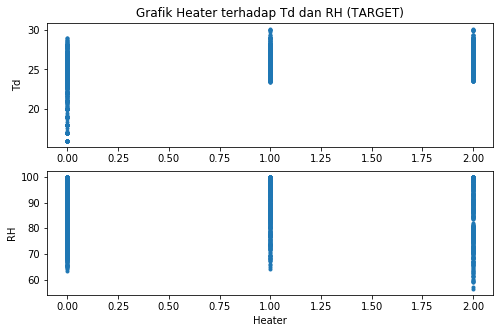

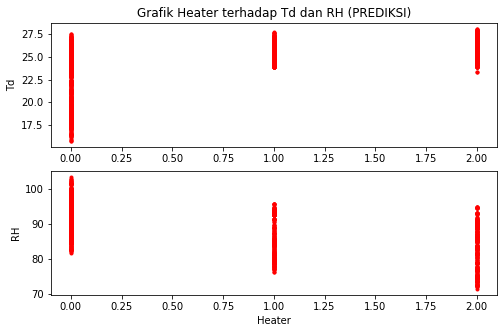

In [13]:
# Grafik Heater terhadap Td dan RH (TARGET)
plt.figure(figsize=(8,5))
plt.subplot(2, 1, 1)
plt.title('Grafik Heater terhadap Td dan RH (TARGET)')
plt.plot(Heater, Td, '.')
plt.ylabel('Td')
plt.subplot(2, 1, 2)
plt.plot(Heater, RH, '.')
plt.ylabel('RH')
plt.xlabel('Heater')
plt.show()

# Grafik Heater terhadap Td dan RH (PREDIKSI)
plt.figure(figsize=(8,5))
plt.subplot(2, 1, 1)
plt.title('Grafik Heater terhadap Td dan RH (PREDIKSI)')
plt.plot(Heater, y_pred.Td, 'r.')
plt.ylabel('Td')
plt.subplot(2, 1, 2)
plt.plot(Heater, y_pred.RH, 'r.')
plt.ylabel('RH')
plt.xlabel('Heater')
plt.show()

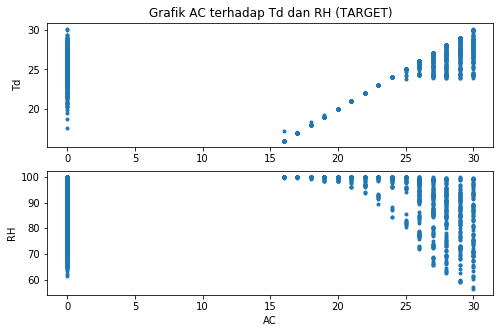

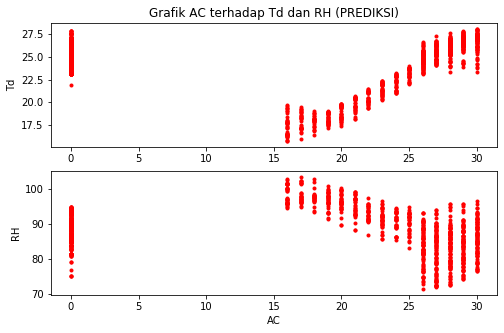

In [14]:
# Grafik AC terhadap Td dan RH (TARGET)
plt.figure(figsize=(8,5))
plt.subplot(2, 1, 1)
plt.title('Grafik AC terhadap Td dan RH (TARGET)')
plt.plot(AC, Td, '.')
plt.ylabel('Td')
plt.subplot(2, 1, 2)
plt.plot(AC, RH, '.')
plt.ylabel('RH')
plt.xlabel('AC')
plt.show()

# Grafik AC terhadap Td dan RH (PREDIKSI)
plt.figure(figsize=(8,5))
plt.subplot(2, 1, 1)
plt.title('Grafik AC terhadap Td dan RH (PREDIKSI)')
plt.plot(AC, y_pred.Td, 'r.')
plt.ylabel('Td')
plt.subplot(2, 1, 2)
plt.plot(AC, y_pred.RH, 'r.')
plt.ylabel('RH')
plt.xlabel('AC')
plt.show()

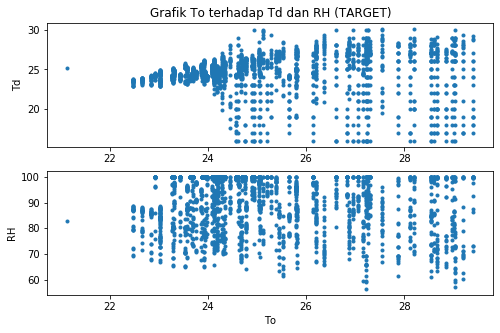

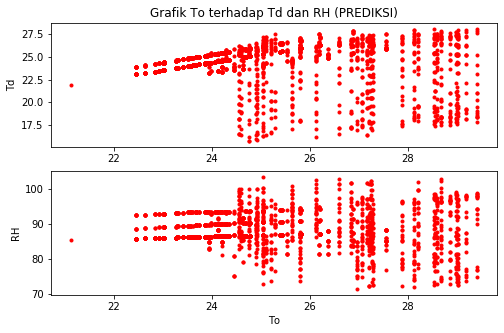

In [15]:
# Grafik To terhadap Td dan RH (TARGET)
plt.figure(figsize=(8,5))
plt.subplot(2, 1, 1)
plt.title('Grafik To terhadap Td dan RH (TARGET)')
plt.plot(To, Td, '.')
plt.ylabel('Td')
plt.subplot(2, 1, 2)
plt.plot(To, RH, '.')
plt.ylabel('RH')
plt.xlabel('To')
plt.show()

# Grafik To terhadap Td dan RH (PREDIKSI)
plt.figure(figsize=(8,5))
plt.subplot(2, 1, 1)
plt.title('Grafik To terhadap Td dan RH (PREDIKSI)')
plt.plot(To, y_pred.Td, 'r.')
plt.ylabel('Td')
plt.subplot(2, 1, 2)
plt.plot(To, y_pred.RH, 'r.')
plt.ylabel('RH')
plt.xlabel('To')
plt.show()

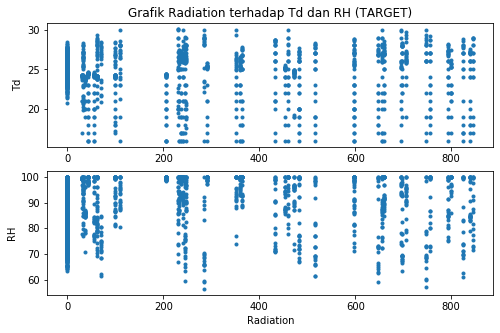

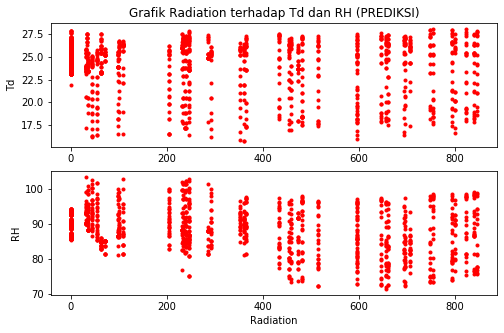

In [16]:
# Grafik Radiation terhadap Td dan RH (TARGET)
plt.figure(figsize=(8,5))
plt.subplot(2, 1, 1)
plt.title('Grafik Radiation terhadap Td dan RH (TARGET)')
plt.plot(Radiation, Td, '.')
plt.ylabel('Td')
plt.subplot(2, 1, 2)
plt.plot(Radiation, RH, '.')
plt.ylabel('RH')
plt.xlabel('Radiation')
plt.show()

# Grafik Radiation terhadap Td dan RH (PREDIKSI)
plt.figure(figsize=(8,5))
plt.subplot(2, 1, 1)
plt.title('Grafik Radiation terhadap Td dan RH (PREDIKSI)')
plt.plot(Radiation, y_pred.Td, 'r.')
plt.ylabel('Td')
plt.subplot(2, 1, 2)
plt.plot(Radiation, y_pred.RH, 'r.')
plt.ylabel('RH')
plt.xlabel('Radiation')
plt.show()

## Visualisation in Time variance

Variasi: DT014


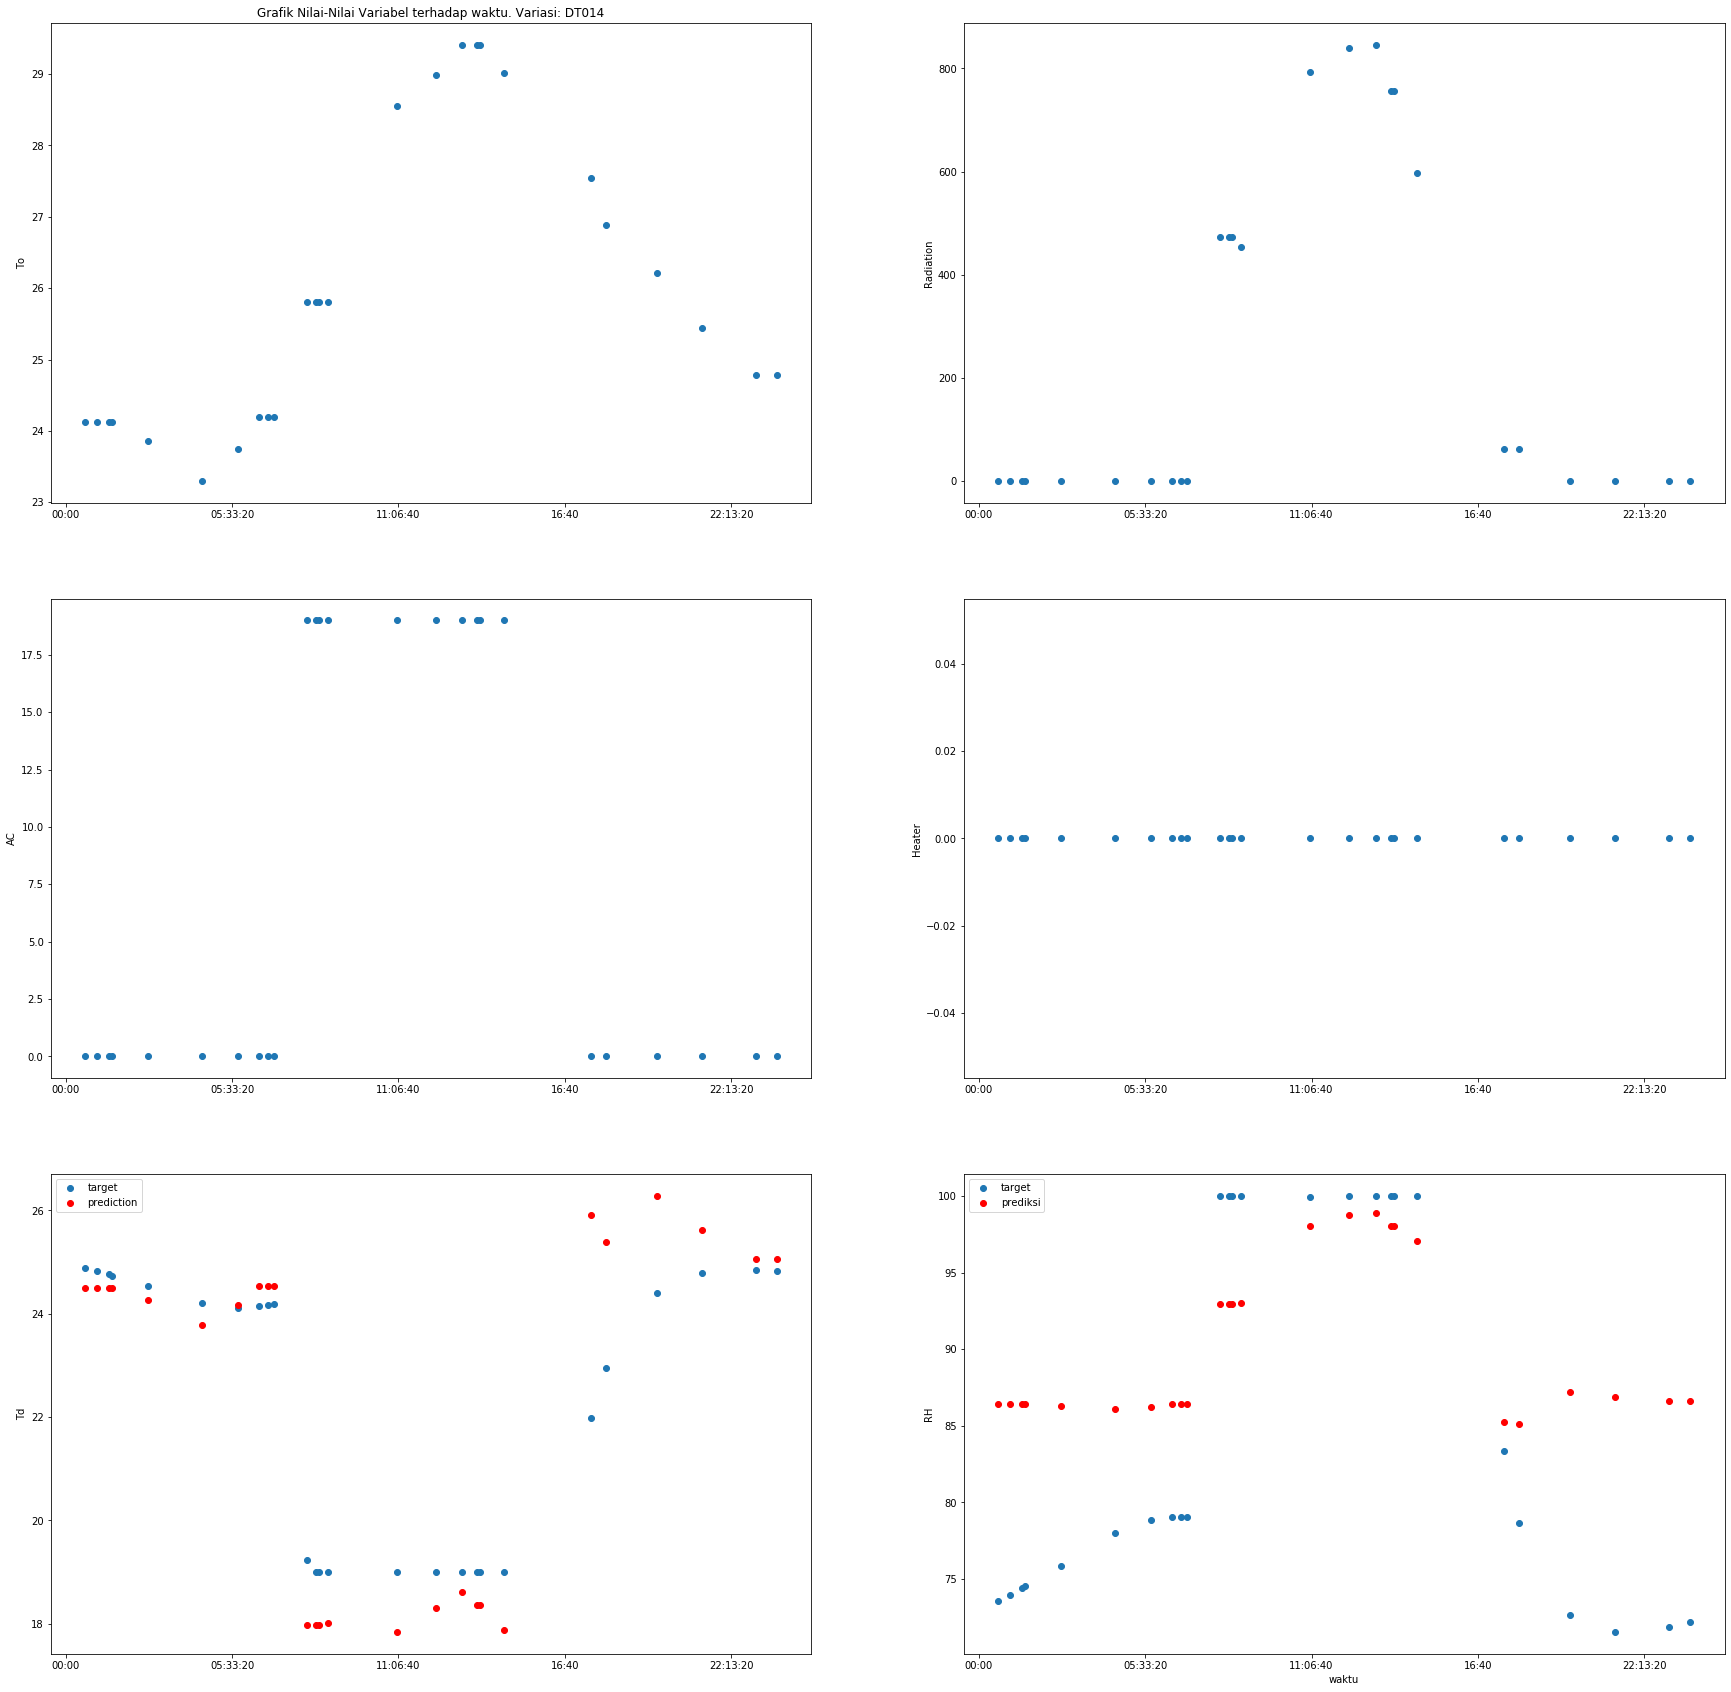

______________________________________________________________________________________________________________

Variasi: DT084


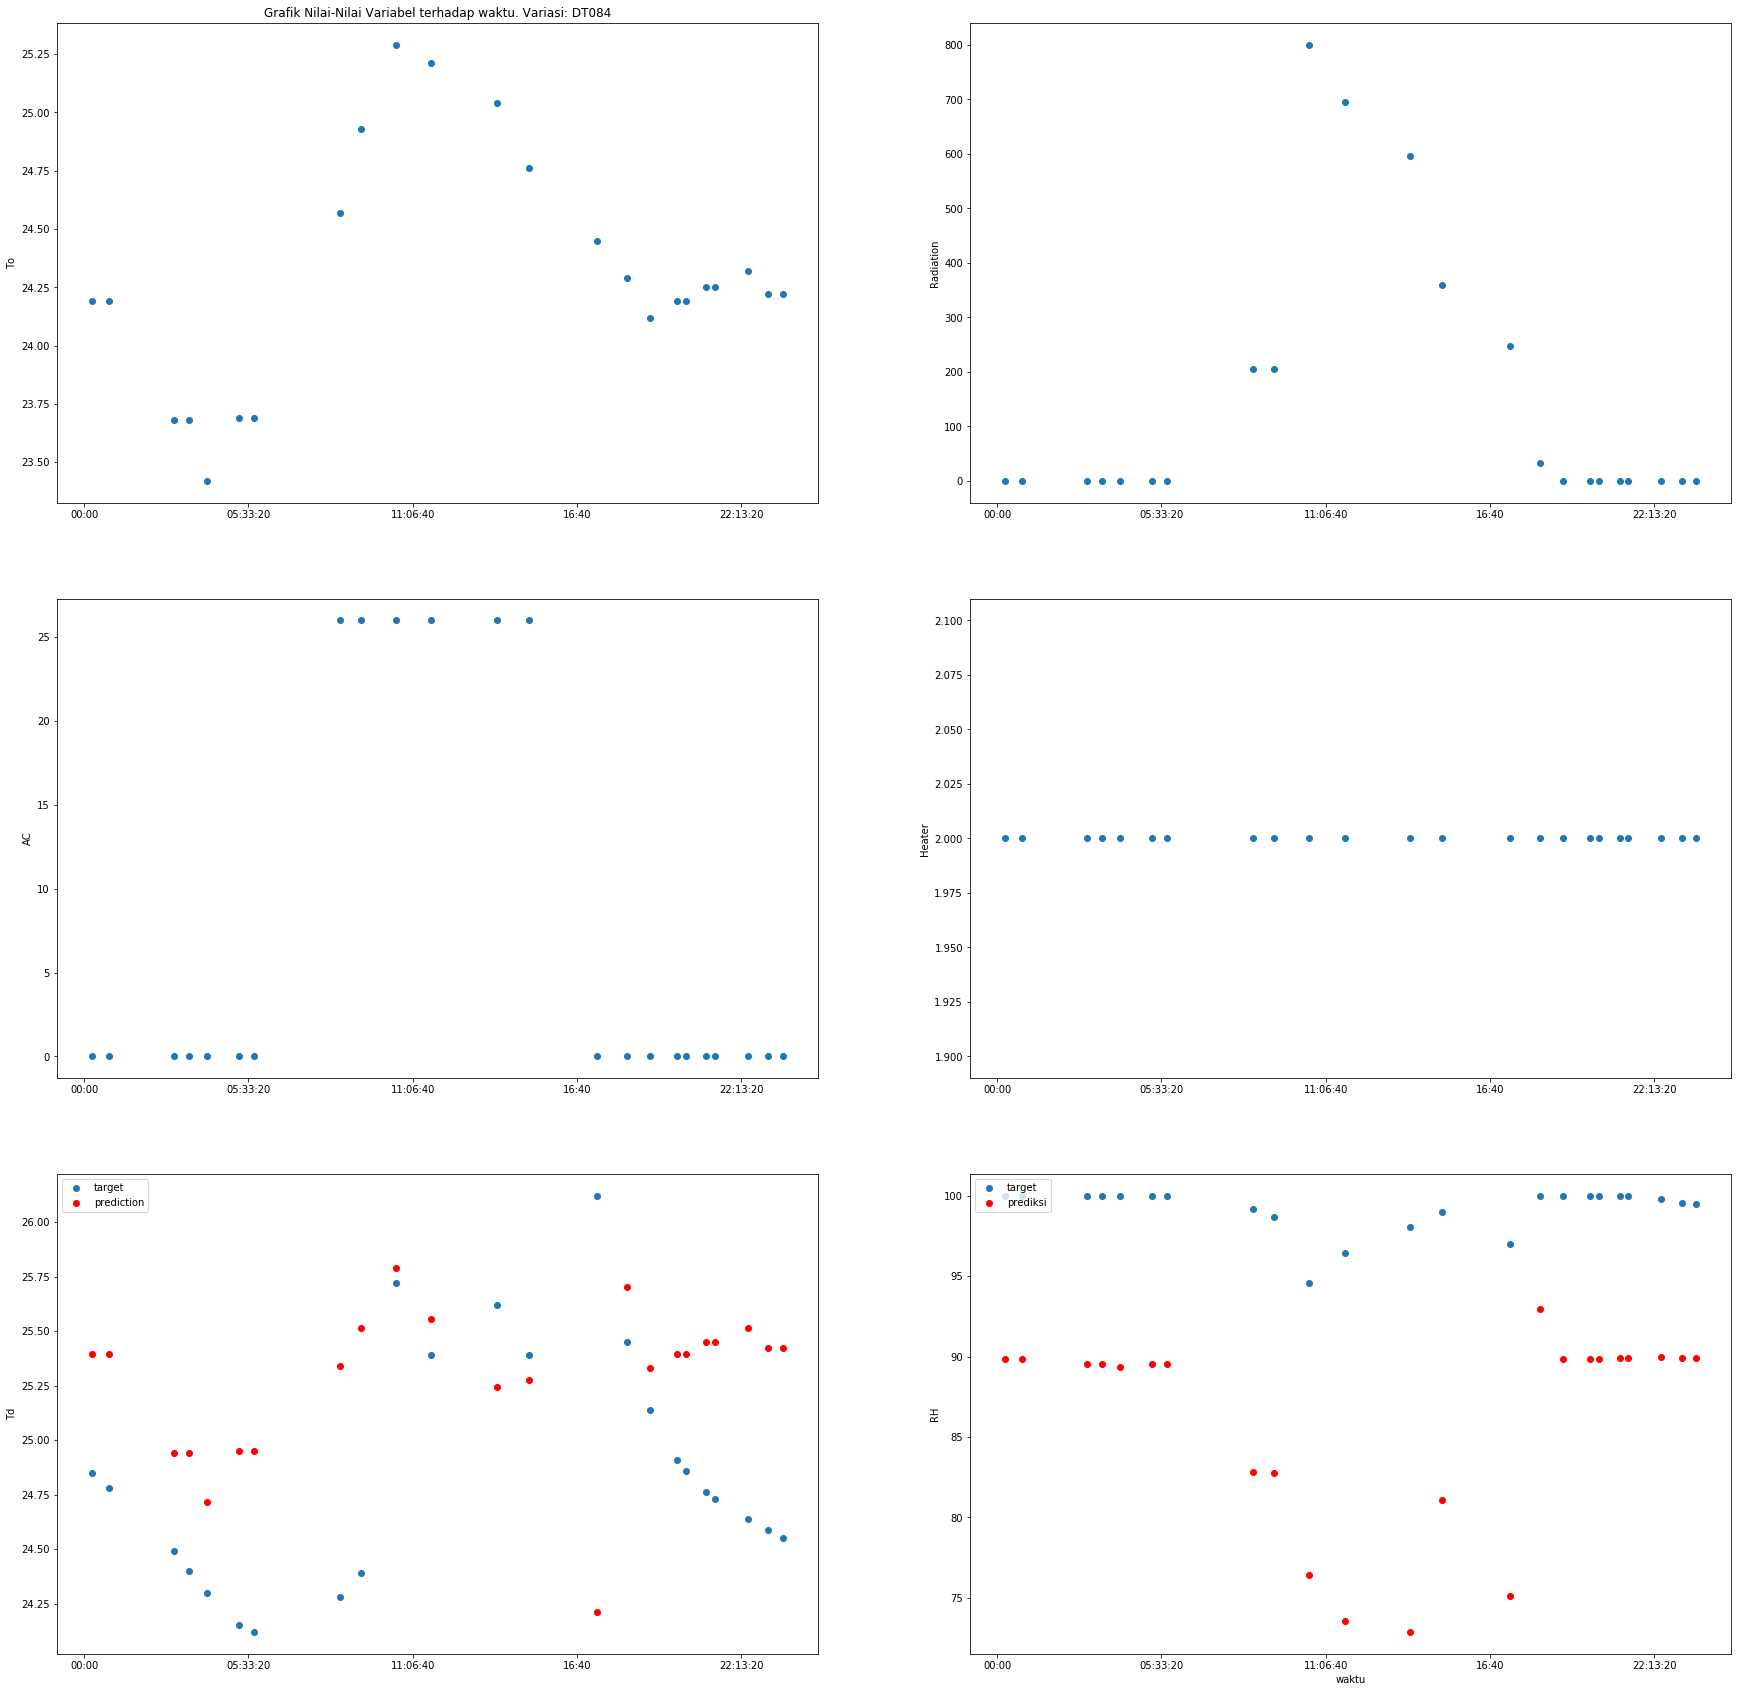

______________________________________________________________________________________________________________

Variasi: DT013


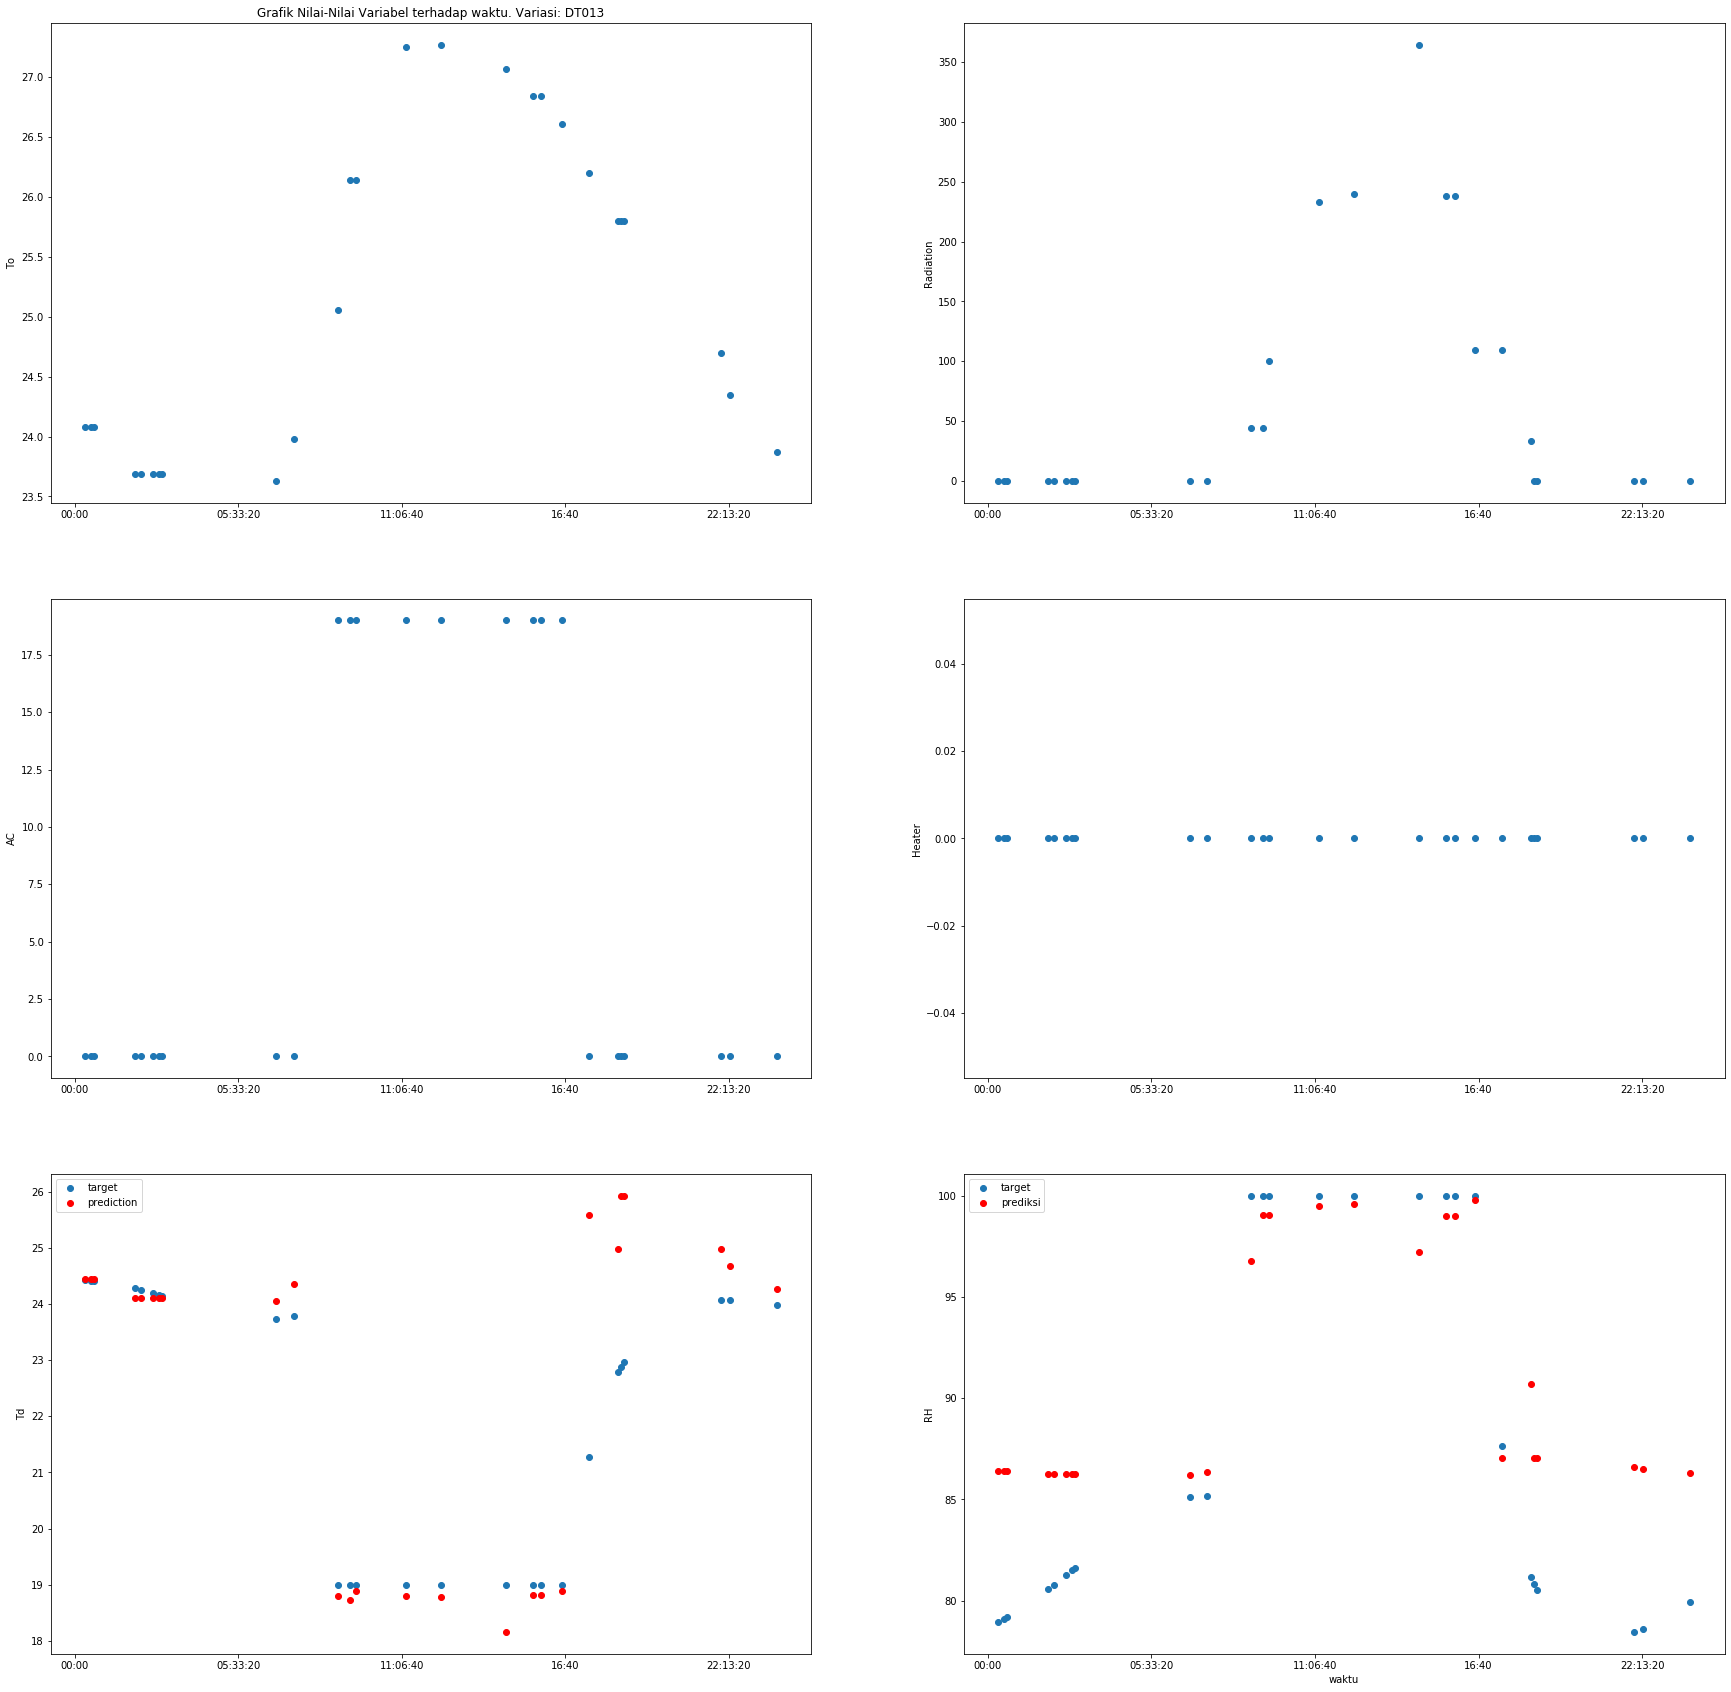

______________________________________________________________________________________________________________



In [17]:
i = 0
for v in y_test.Variation.unique():
    print('Variasi:', v)
    
    x1  = y_test.loc[y_test['Variation']==v].Time
    
    y1  = X_test.loc[y_test['Variation']==v].AC
    y2  = X_test.loc[y_test['Variation']==v].Heater
    y3  = X_test.loc[y_test['Variation']==v].To
    y4  = X_test.loc[y_test['Variation']==v].Radiation
    y5a = y_test.loc[y_test['Variation']==v].Td
    y5b = y_pred.loc[y_pred['Variation']==v].Td
    y6a = y_test.loc[y_test['Variation']==v].RH
    y6b = y_pred.loc[y_pred['Variation']==v].RH
    
    plt.subplots(figsize=(30,30))
    
    plt.subplot(3,2,1)
    plt.title('Grafik Nilai-Nilai Variabel terhadap waktu. Variasi: ' + str(v))
    plt.plot(x1, y3, 'o')
    plt.xlabel(None)
    plt.ylabel('To')
    
    plt.subplot(3,2,2)
    plt.plot(x1, y4, 'o')
    plt.xlabel(None)
    plt.ylabel('Radiation')
    
    plt.subplot(3,2,3)
    plt.plot(x1, y1, 'o')
    plt.xlabel(None)
    plt.ylabel('AC')
    
    plt.subplot(3,2,4)
    plt.plot(x1, y2, 'o')
    plt.xlabel(None)
    plt.ylabel('Heater')
    
    plt.subplot(3,2,5)
    plt.plot(x1, y5a, 'o', label='target')
    plt.plot(x1, y5b, 'ro', label='prediction')
    plt.xlabel(None)
    plt.ylabel('Td')
    plt.legend(loc = 'upper left')
    
    plt.subplot(3,2,6)
    plt.plot(x1, y6a, 'o', label='target')
    plt.plot(x1, y6b, 'ro', label='prediksi')
    plt.xlabel('waktu')
    plt.ylabel('RH')
    plt.legend(loc = 'upper left')
    
    plt.show()
    
    print('_'*110)
    print()
    
    i+=1
    if i == 3:
        break